In [1]:
import sys

sys.path.append('../GSL')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from glob import glob
import pickle
import yaml
from easydict import EasyDict as edict

from torch_geometric.utils import to_dense_adj, dense_to_sparse

In [3]:
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt

/var/folders/fl/mgh5rhv529ddrf0l95hl_zcm0000gn/T/ipykernel_64089/4217889648.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [4]:
adj_matrix = np.load('../GSL/data/PEMS-BAY/pems_adj_mat.npy')

In [5]:
sav_fig = False

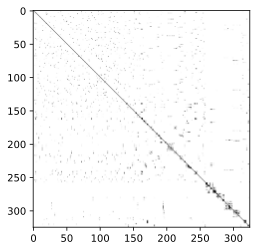

In [6]:
plt.imshow(adj_matrix, cmap='Greys')

if sav_fig:
    plt.savefig('./GroudTruth_adj.png')

In [7]:
edge_index_g, _ = dense_to_sparse(torch.Tensor(adj_matrix))

In [9]:
exp_dirs = glob('../exp/exp_name/*')
exp_dirs.sort()
exp_dirs

['../exp/exp_name/model_name_0517_175459']

In [10]:
exp = exp_dirs[0]

In [11]:
config_file = glob(exp+'/*.yaml')[0]
config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

In [12]:
train_result_dirs = glob(exp+'/training_result.pickle')
train_result = pickle.load(open(train_result_dirs[0], 'rb'))

test_result_dirs = glob(exp+'/test_result.pickle')
test_result = pickle.load(open(test_result_dirs[0], 'rb'))

In [17]:
train_result.keys()

dict_keys(['train_loss', 'val_loss', 'attention_matrix', 'val_adj_matirix'])

In [18]:
test_result.keys()

dict_keys(['stack_per_outputs', 'backcast', 'test_loss', 'adj_matrix', 'prediction', 'target', 'attention_matrix'])

In [ ]:
test_result

In [13]:
edge_ = []

for i in range(config.train.epoch):
    edge_.append(train_result['val_adj_matirix'][i].shape[1])

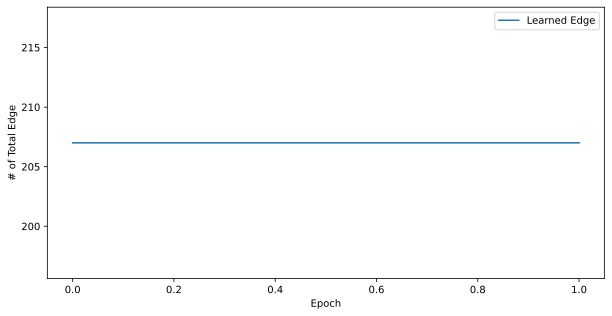

In [14]:
f, axes = plt.subplots(figsize=(10, 5))


axes.plot(edge_, label = 'Learned Edge')
axes.set_xlabel('Epoch')
axes.set_ylabel('# of Total Edge')
axes.legend()

if sav_fig:
    f.savefig('./edge_result.png')

In [22]:
learn_adj = test_result['adj_matrix'].detach().cpu()

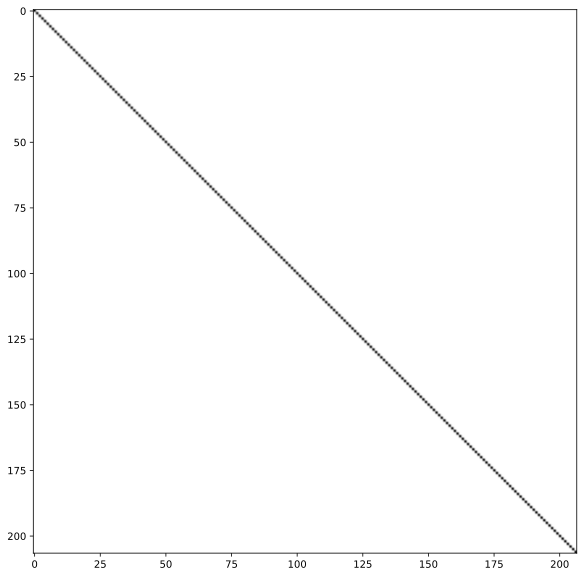

In [24]:
f, axes = plt.subplots(figsize=(10,10))

axes.imshow(learn_adj, cmap='Greys')

if sav_fig:
    f.savefig('./learned_adj_matrix.png')

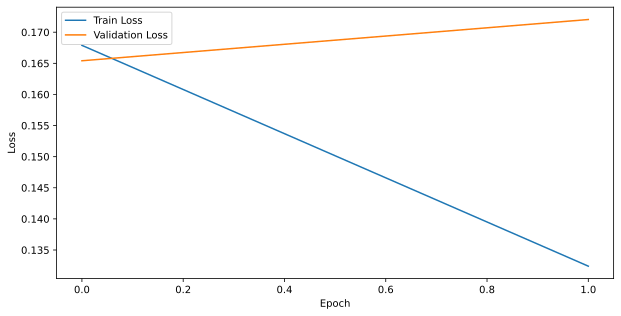

In [25]:
f, axes = plt.subplots(figsize=(10, 5))

axes.plot(train_result['train_loss'], label='Train Loss')
axes.plot(train_result['val_loss'], label='Validation Loss')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

if sav_fig:
    f.savefig('./Learning_curve.png')

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

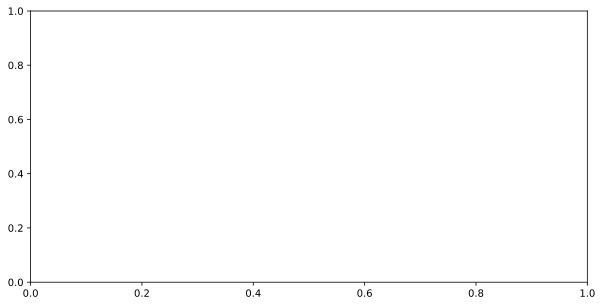

In [26]:
f, axes = plt.subplots(figsize=(10, 5))
epoch = np.arange(100)

axes.plot(epoch, train_result['train_loss'], label='Train Loss', color='#871C00')
axes.plot(epoch, train_result['val_loss'], label='val Loss', color='#EC3100')
axes.tick_params(axis='y')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

axes2 = axes.twinx()
axes2.plot(epoch, edge_, label='Edge', color='#CDC0BC')
axes2.tick_params(axis='y')
axes2.set_ylabel('# of Total Edge')
axes2.legend(loc='upper left')

if sav_fig:
    f.savefig('./relation_edge_loss.png')

In [34]:
len(test_result['target'])

1714

In [35]:
targets = torch.stack(test_result['target'])
pred = torch.stack(test_result['prediction'])

In [36]:
targets.shape

torch.Size([1714, 414, 1])

In [29]:
targets, pred = targets[0], pred[0]

In [31]:
target = targets.reshape(config.dataset.nodes_num, -1, 3)
pred = pred.reshape(config.dataset.nodes_num, -1, 3)

RuntimeError: shape '[207, -1, 3]' is invalid for input of size 414

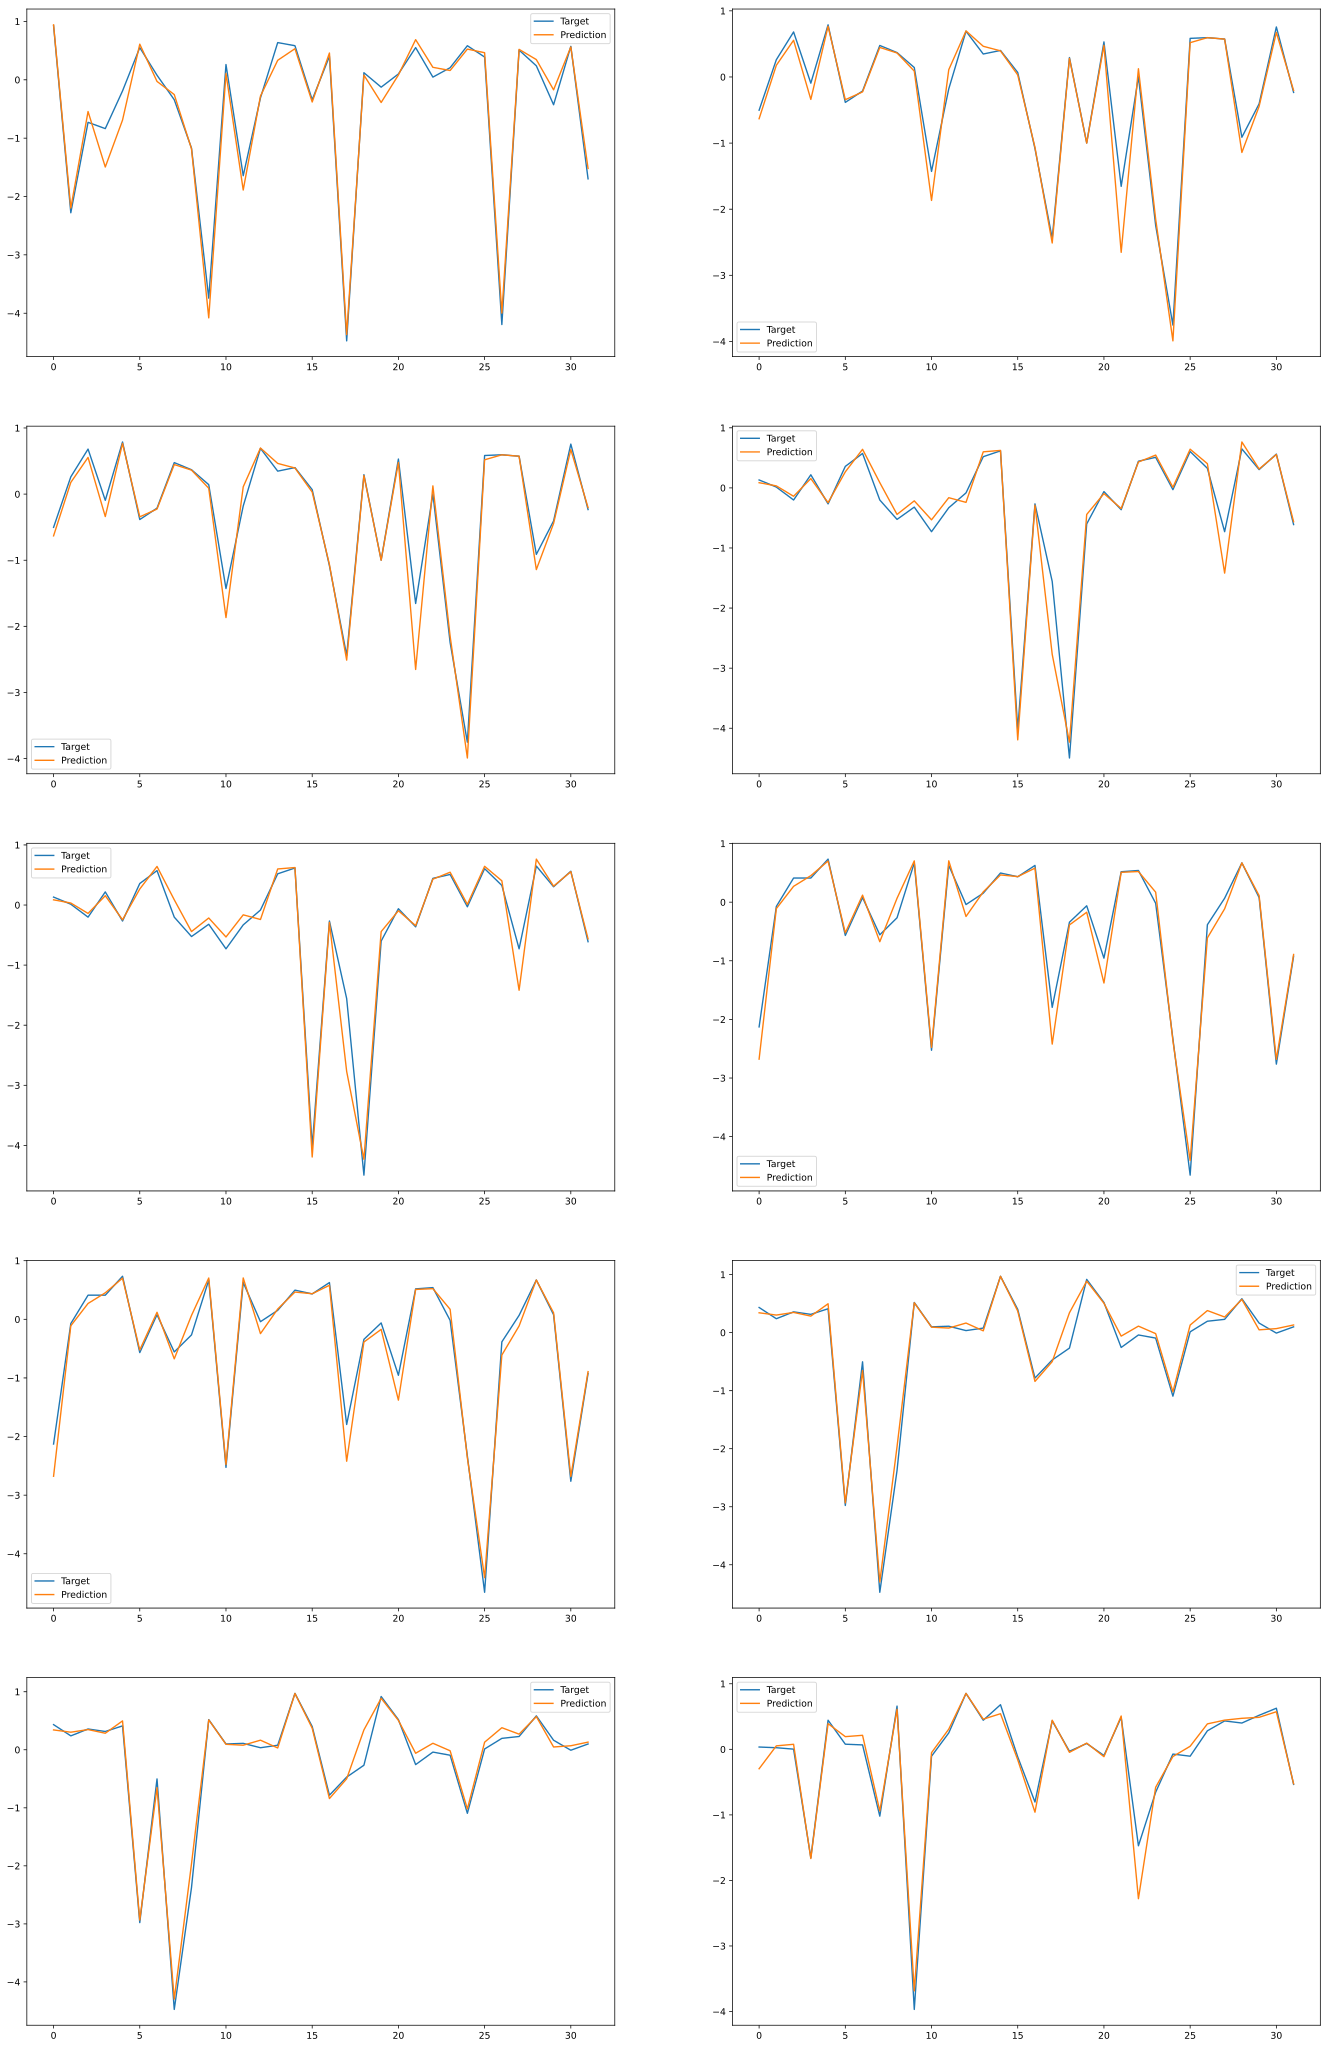

In [76]:
nrow = 5
ncol = 2

f, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(5*nrow, 20*ncol), dpi=70)

for ii in range(nrow):
    for jj in range(ncol):
        axes[ii,jj].plot(target[ii+jj, :, 0], label='Target')
        axes[ii,jj].plot(pred[ii+jj, :, 0], label='Prediction')
        axes[ii,jj].legend()
        
if sav_fig:
    f.savefig('./prediction_result.pdf')